In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import collections
import xlsxwriter 

In [2]:
#import data set
products_df = pd.read_csv('part_bdml_data.csv')
products_df.head(5)

,customerId,products
0,0,20
1,1,2|2|23|68|68|111|29|86|107|152
2,2,111|107|29|11|11|11|33|23
3,3,164|227
4,5,2|2


In [3]:
#Split the values
products_df['products'] = products_df.products.str.split('|')

In [4]:
x=products_df['products'] 


In [5]:
#Checking to convert frequency as ratings
p=pd.value_counts(x[0])
p

20    1
dtype: int64

In [6]:
#Checking index
y=p.index
  

In [7]:
#Make rating matrics
a = (80,300)
b=np.zeros(a)

In [8]:
#Saving Customer ID
z=products_df['customerId'] 


In [9]:
#Make customer ID and ratings of products

for i in range(0,80):
    p=pd.value_counts(x[i])
    y=p.index
    for k in range(0,80):
        b[k,0]=z[k]
        for j in range(0,y.size):
            b[i,(int(y[j])+1)]=p[j]
        
print(b)        
    
b=b.T 

[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   0.   0. ...   0.   0.   0.]
 [  2.   0.   0. ...   0.   0.   0.]
 ...
 [ 98.   0.   0. ...   0.   0.   0.]
 [ 99.   0.   0. ...   0.   0.   0.]
 [100.   3.   0. ...   0.   0.   0.]]


In [10]:
#Delete customer ID 
inputs=np.delete(b,0,0)
inputs=inputs.T
print(inputs.shape)
inputs

(80, 299)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [12]:
def predict(P,Q):
    return np.dot(P.T,Q)

In [13]:
def operation(inputs,alpha,k,n_epochs):
    train_errors = []
    m,n=inputs.shape #80 #299
    P = np.random.rand(k,m) # Latent user matrix (2,80)
    Q = np.random.rand(k,n) # Latent item matrix (2,299)
    prediction=np.dot(P.T,Q) #80 #299
    for epoch in range(n_epochs):
        
        for u in range(0,m): #80
            for i in range(0,n): #299
                e = inputs[u, i] - np.dot(P[:,u],Q[:,i]) #299,80
                P[:, u] = P[:, u]+ alpha * (2 * (e * Q[:, i]))    
                Q[:, i] = Q[:, i]+ alpha * (2 * (e * P[:, u]))
        
        R=predict(P,Q)
        train_rmse = sqrt(mean_squared_error(R, inputs))
        train_errors.append(train_rmse)
        
    return R,train_errors          
              

In [14]:
Ratings,train_error=operation(inputs,0.001,2,200)
Ratings.shape



(80, 299)

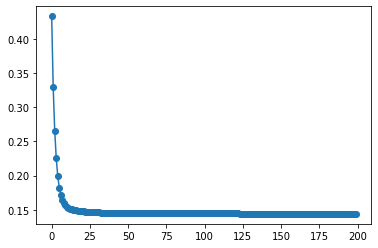

In [15]:
n_epochs=200
import matplotlib.pyplot as plt
plt.plot(range(n_epochs), train_error, marker='o', label='Training Data')

In [16]:
#Make a for loop for all the product ID
l=list(range(0,299))

In [17]:
#Make Weighted matrics
def user(x,atings):
    reatings=ratings.t
    m=ratings[:,x]
    o=np.vstack([l,m])
    o=o.T
    v=o[o[:,1].argsort()[::-1]]
    print(type(v))
    return v[:,0]


In [18]:
# Find final answer for user 7
answer_final=list(user(7,Ratings))
type(answer_final[0])


AttributeError: 'numpy.ndarray' object has no attribute 't'

In [ ]:
#Previous Product ID 
q=(x[7])
list_set = set(q) 
q = (list(list_set))
q